# Introduction

Notebook to aggregate the running of models in the context of traceability between **test cases** and **bug reports**.

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

from modules.models_runner import tc_br_strat_runner
from modules.utils import aux_functions
from modules.utils import firefox_dataset_p2 as fd

import warnings; warnings.simplefilter('ignore')

testcases = fd.Datasets.read_testcases_df()
bugreports = fd.Datasets.read_selected_bugreports_df()
features = fd.Datasets.read_features_df()

TestCases.shape: (195, 12)
SelectedBugReports.shape: (91, 18)
Features.shape: (19, 8)


# Run All Models

## Intersec Strategy

In [2]:
exp_vol_intersec_strat_runner = tc_br_strat_runner.TC_BR_Exp_Vol_Intersec_Strat_Runner()
exp_vol_intersec_strat_runner.execute()

evaluator_2 = exp_vol_intersec_strat_runner.get_evaluator() 
evals_df_2 = exp_vol_intersec_strat_runner.get_evals_df()

OracleExpertVolunteers_INTERSEC.shape: (195, 91)
TestCases.shape: (195, 12)
SelectedBugReports.shape: (91, 18)
Running LSI Model ------
Running LDA Model -----
Running BM25 Model -----
Running W2V Model ------
Running ZeroR model -----
OracleExpertVolunteers_INTERSEC.shape: (195, 91)
major_target_artifact: [13, 20, 14, 25, 24, 22, 21, 23, 19, 18, 17, 16, 15]
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 
Evaluating ZERO_R Model ----- 


### Results

In [3]:
evals_df_2.head()

,model,ref_name,perc_precision,perc_recall,perc_fscore,sim_threshold,top,trace_links_df
0,lsi,top_10_cosine_0.0,24.29,43.0,31.04,0.0,10.0,Bug_Number 1248267 1248268 1257087 1264988...
1,lsi,top_10_cosine_0.1,24.29,43.0,31.04,0.1,10.0,Bug_Number 1248267 1248268 1257087 1264988...
2,lsi,top_10_cosine_0.2,24.37,43.0,31.10,0.2,10.0,Bug_Number 1248267 1248268 1257087 1264988...
3,lsi,top_10_cosine_0.3,24.39,43.0,31.13,0.3,10.0,Bug_Number 1248267 1248268 1257087 1264988...
4,lsi,top_10_cosine_0.4,24.45,43.0,31.17,0.4,10.0,Bug_Number 1248267 1248268 1257087 1264988...


In [4]:
evals_df_2_1 = evals_df_2[evals_df_2.top != 19.0]
aux_functions.highlight_df( evals_df_2_1[['model','perc_precision','perc_recall','perc_fscore','top']].groupby(['model','top']).mean())

### Plots

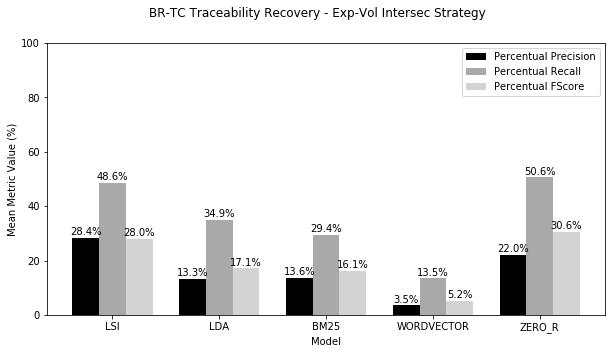

In [5]:
evaluator_2.plot_evaluations_3(evals_df_2, title='BR-TC Traceability Recovery - Exp-Vol Intersec Strategy')

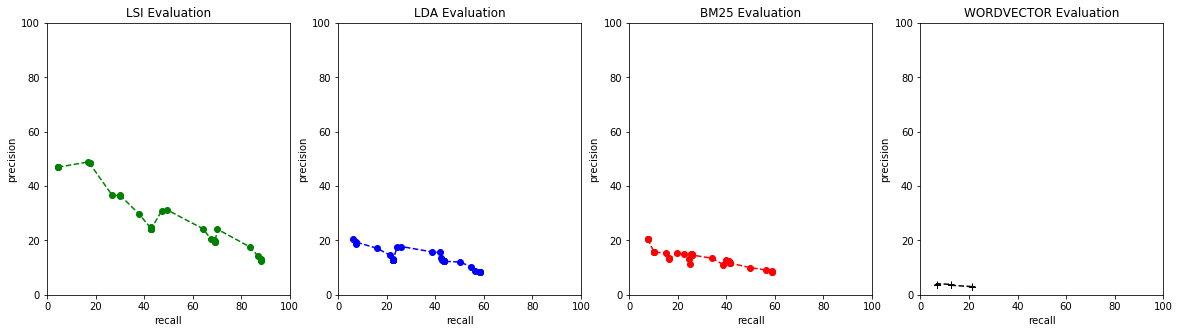

In [6]:
evaluator_2.plot_evaluations_4(evals_df_2)

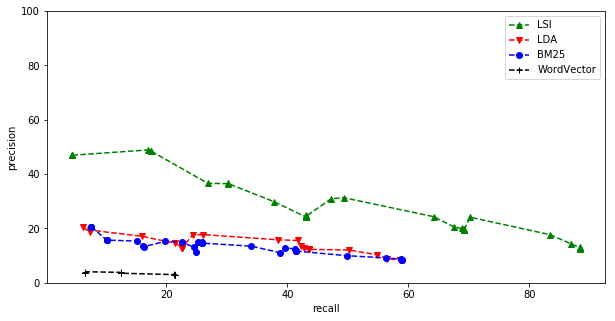

In [7]:
evaluator_2.plot_evaluations_5(evals_df_2)

### Oracle True Traces

In [8]:
oracle_true_traces_inter = aux_functions.get_oracle_true_positives(exp_vol_intersec_strat_runner)
print('len(oracle_true_traces_inter): {}'.format(len(oracle_true_traces_inter)))

len(oracle_true_traces_inter): 514


#### Oracle

In [9]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_evaluator().get_oracle_df().iloc[0:13,0:12])

Bug_Number,1248267,1248268,1257087,1264988,1267480,1267501,1269348,1269485,1270274,1270983,1271607,1276120
TC_Number,,,,,,,,,,,,
13,0,0,0,1,0,0,0,0,0,0,0,1
14,0,0,0,1,0,0,0,0,0,0,0,1
15,0,0,0,1,0,0,0,0,0,0,0,1
16,0,0,0,1,0,0,0,0,0,0,0,1
17,0,0,0,1,0,0,0,0,0,0,0,1
18,0,0,0,1,0,0,0,0,0,0,0,1
19,0,0,0,1,0,0,0,0,0,0,0,1
20,0,0,0,1,0,0,0,0,0,0,0,1
21,0,0,0,1,0,0,0,0,0,0,0,1


#### Similarity Matrices Analysis

##### **LDA**

In [10]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix().iloc[0:13,0:12])

Bug_Number,1248267,1248268,1257087,1264988,1267480,1267501,1269348,1269485,1270274,1270983,1271607,1276120
TC_Number,,,,,,,,,,,,
13,0.126582,0.105046,0.276218,0.22171,0.827142,0.372933,0.14325,0.123384,0.819053,0.408286,0.443309,0.102148
14,0.317495,0.252128,0.303893,0.168187,0.972023,0.304656,0.0811337,0.0843016,0.712927,0.442561,0.380634,0.0747255
15,0.10915,0.101071,0.240433,0.171051,0.835602,0.342379,0.0632099,0.0570443,0.827263,0.408751,0.428924,0.0583721
16,0.113487,0.106775,0.235548,0.170323,0.792168,0.328413,0.0705145,0.0630786,0.784869,0.395096,0.410971,0.0649968
17,0.110505,0.107775,0.205606,0.154007,0.640207,0.27384,0.0770546,0.0689241,0.635923,0.333385,0.342051,0.0710241
18,0.107986,0.0996728,0.239316,0.169901,0.835118,0.341577,0.061981,0.0558662,0.826647,0.407704,0.427938,0.0572224
19,0.127082,0.106098,0.243428,0.222032,0.83314,0.343243,0.068161,0.0907269,0.825126,0.411226,0.446467,0.0903102
20,0.105766,0.0970041,0.237182,0.167706,0.83418,0.340041,0.0596365,0.0536186,0.825457,0.405702,0.426048,0.0550287
21,0.103972,0.0948488,0.235455,0.165932,0.833409,0.338796,0.0577433,0.0518037,0.824483,0.404079,0.424516,0.0532573


##### **LSI**

In [11]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix().iloc[0:13,0:12])

Bug_Number,1248267,1248268,1257087,1264988,1267480,1267501,1269348,1269485,1270274,1270983,1271607,1276120
TC_Number,,,,,,,,,,,,
13,0.160448,0.19947,0.46343,0.699438,0.45909,0.398544,0.179677,0.375838,0.499973,0.385456,0.405358,0.217433
14,0.175316,0.19331,0.514992,0.723357,0.388498,0.34792,0.176904,0.307352,0.387626,0.248639,0.399613,0.19491
15,0.0816225,0.114636,0.436492,0.73919,0.409831,0.263488,0.265879,0.232089,0.412656,0.292841,0.306022,0.128264
16,0.168325,0.14874,0.505352,0.702639,0.373976,0.337684,0.234899,0.282048,0.363812,0.289344,0.370027,0.157867
17,0.195552,0.153213,0.539847,0.59279,0.393716,0.374408,0.644246,0.294487,0.381735,0.501938,0.412678,0.205013
18,0.066099,0.10513,0.408605,0.679167,0.413414,0.316088,0.187777,0.282792,0.440803,0.301647,0.326549,0.158008
19,0.118581,0.155334,0.468565,0.649821,0.581196,0.41066,0.270597,0.334473,0.513909,0.448956,0.385948,0.21856
20,0.101477,0.15062,0.448701,0.575802,0.661463,0.374579,0.254352,0.306973,0.503445,0.424996,0.320481,0.184637
21,0.103599,0.153518,0.458583,0.6023,0.633237,0.367574,0.251237,0.298102,0.499632,0.410142,0.326667,0.175842


##### **BM25**

In [12]:
#aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_bm25_model().get_sim_matrix())

##### **Word Vector**

In [13]:
import numpy as np

wv_sim_matrix = exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix()

wv_sim_values = []
for idx,row in wv_sim_matrix.iterrows():
    for col in wv_sim_matrix.columns:
        wv_sim_values.append(wv_sim_matrix.at[idx,col])

print("Mean Similarity Value: {}".format(np.mean(wv_sim_values)))
print("Std Similarity Value: {}".format(np.std(wv_sim_values)))

#aux_functions.highlight_df(wv_sim_matrix)

Mean Similarity Value: 0.9070996796178279
Std Similarity Value: 0.03517528954815485


#### LDA Topics

In [14]:
exp_vol_intersec_strat_runner.get_lda_model().print_topics()

Topic #0: custom tab video toolbar link control drop item devic open
Topic #1: choos question display toolbar content ani close bookmark bar remov
Topic #2: widevin webm eme video support start load choos play web
Topic #3: download dropmak panel file click open item folder button icon
Topic #4: choos question display toolbar content ani close bookmark bar remov
Topic #5: pdf consol file browser theme child mode select use viewer
Topic #6: scroll mous apz make true sure config async wireless wire
Topic #7: icon awesom reader narrat speech bar display correctli mode text
Topic #8: choos question display toolbar content ani close bookmark bar remov
Topic #9: choos question display toolbar content ani close bookmark bar remov
Topic #10: bookmark toolbar desktop option warn work expect avail button tri
Topic #11: context menu page imag bring link option thi question open
Topic #12: text select field previou ha anoth differ keyboard left default
Topic #13: zoom indic bar locat key page disp

### Retrieved Traces - Similarity Threshold 0.0

In [15]:
retrieved_traces_df = aux_functions.get_retrieved_traces_df(oracle=exp_vol_intersec_strat_runner.get_oracle(), evals_df=evals_df_2, top_values=[10,20,40], sim_threshs=[0.0])
retrieved_traces_df[['top','sim_thresh','model','TP_amount','FP_amount','FN_amount','precision','recall','fscore']].head(50)

,top,sim_thresh,model,TP_amount,FP_amount,FN_amount,precision,recall,fscore
0,10,0.0,lsi,221,689,293,24.29,43.00,31.04
3,10,0.0,lda,116,794,398,12.75,22.57,16.29
6,10,0.0,bm25,133,778,381,14.60,25.88,18.67
9,10,0.0,wordvector,34,876,480,3.74,6.61,4.78
1,20,0.0,lsi,356,1464,158,19.56,69.26,30.51
4,20,0.0,lda,224,1596,290,12.31,43.58,19.19
7,20,0.0,bm25,213,1609,301,11.69,41.44,18.24
10,20,0.0,wordvector,64,1756,450,3.52,12.45,5.48
2,40,0.0,lsi,454,3186,60,12.47,88.33,21.86
5,40,0.0,lda,301,3339,213,8.27,58.56,14.49


#### Traces Not Captured by Any Technique

In [16]:
print('TOP 10 --------------------------')
all_captured_traces_t10_inter = aux_functions.get_captured_traces_union(top_value=10, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t10_inter = oracle_true_traces_inter - all_captured_traces_t10_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t10_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t10_inter), len(oracle_true_traces_inter), len(not_captured_traces_t10_inter)/len(oracle_true_traces_inter)*100))

details_df_t10 = aux_functions.detail_features_tc_br(not_captured_traces_t10_inter, testcases, bugreports)
display(details_df_t10.groupby('tc_feat').count())

print('\n\nTOP 20 --------------------------')
all_captured_traces_t20_inter = aux_functions.get_captured_traces_union(top_value=20, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t20_inter = oracle_true_traces_inter - all_captured_traces_t20_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t20_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t20_inter), len(oracle_true_traces_inter), len(not_captured_traces_t20_inter)/len(oracle_true_traces_inter)*100))

details_df_t20 = aux_functions.detail_features_tc_br(not_captured_traces_t20_inter, testcases, bugreports)
display(details_df_t20.groupby('tc_feat').count())

print('\n\nTOP 40 --------------------------')
all_captured_traces_t40_inter = aux_functions.get_captured_traces_union(top_value=40, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t40_inter = oracle_true_traces_inter - all_captured_traces_t40_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t40_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t40_inter), len(oracle_true_traces_inter), len(not_captured_traces_t40_inter)/len(oracle_true_traces_inter)*100))

details_df_t40 = aux_functions.detail_features_tc_br(not_captured_traces_t40_inter, testcases, bugreports)
display(details_df_t40.groupby('tc_feat').count())

TOP 10 --------------------------
len(not_captured_traces): 203
percent not_captured_traces: 203/514 * 100 : 39.49%


,tc,br,br_summary
tc_feat,,,
Browser Customization,5,5,5
Context Menu,58,58,58
Downloads Dropmaker,20,20,20
Indicator for device permissions,11,11,11
New Awesome Bar,101,101,101
PDF Viewer,1,1,1
Zoom Indicator,7,7,7




TOP 20 --------------------------
len(not_captured_traces): 108
percent not_captured_traces: 108/514 * 100 : 21.01%


,tc,br,br_summary
tc_feat,,,
Browser Customization,4,4,4
Context Menu,27,27,27
Downloads Dropmaker,10,10,10
Indicator for device permissions,3,3,3
New Awesome Bar,64,64,64




TOP 40 --------------------------
len(not_captured_traces): 36
percent not_captured_traces: 36/514 * 100 : 7.004%


,tc,br,br_summary
tc_feat,,,
Context Menu,4,4,4
Downloads Dropmaker,4,4,4
New Awesome Bar,28,28,28


##### Missed Traces Detailed

In [17]:
import pandas as pd

lda_model = exp_vol_intersec_strat_runner.get_lda_model()
lsi_model = exp_vol_intersec_strat_runner.get_lsi_model()
bm25_model = exp_vol_intersec_strat_runner.get_bm25_model()

df = pd.DataFrame(columns=['mrw_tcs','mrw_brs'], index=['lda_t10','lsi_t10','bm25_t10',
                                                        'lda_t20','lsi_t20','bm25_t20',
                                                        'lda_t40','lsi_t40','bm25_t40'])

lda_mrw_tc_t10, lda_mrw_br_t10 = aux_functions.get_mrw_traces_set(not_captured_traces_t10_inter, lda_model)
lda_mrw_tc_t20, lda_mrw_br_t20 = aux_functions.get_mrw_traces_set(not_captured_traces_t20_inter, lda_model)
lda_mrw_tc_t40, lda_mrw_br_t40 = aux_functions.get_mrw_traces_set(not_captured_traces_t40_inter, lda_model)

lsi_mrw_tc_t10, lsi_mrw_br_t10 = aux_functions.get_mrw_traces_set(not_captured_traces_t10_inter, lsi_model)
lsi_mrw_tc_t20, lsi_mrw_br_t20 = aux_functions.get_mrw_traces_set(not_captured_traces_t20_inter, lsi_model)
lsi_mrw_tc_t40, lsi_mrw_br_t40 = aux_functions.get_mrw_traces_set(not_captured_traces_t40_inter, lsi_model)

bm25_mrw_tc_t10, bm25_mrw_br_t10 = aux_functions.get_mrw_traces_set(not_captured_traces_t10_inter, bm25_model)
bm25_mrw_tc_t20, bm25_mrw_br_t20 = aux_functions.get_mrw_traces_set(not_captured_traces_t20_inter, bm25_model)
bm25_mrw_tc_t40, bm25_mrw_br_t40 = aux_functions.get_mrw_traces_set(not_captured_traces_t40_inter, bm25_model)

df.at['lda_t10','mrw_tcs'] = lda_mrw_tc_t10
df.at['lda_t10','mrw_brs'] = lda_mrw_br_t10
df.at['lda_t20','mrw_tcs'] = lda_mrw_tc_t20
df.at['lda_t20','mrw_brs'] = lda_mrw_br_t20
df.at['lda_t40','mrw_tcs'] = lda_mrw_tc_t40
df.at['lda_t40','mrw_brs'] = lda_mrw_br_t40


df.at['lsi_t10','mrw_tcs'] = lsi_mrw_tc_t10
df.at['lsi_t10','mrw_brs'] = lsi_mrw_br_t10
df.at['lsi_t20','mrw_tcs'] = lsi_mrw_tc_t20
df.at['lsi_t20','mrw_brs'] = lsi_mrw_br_t20
df.at['lsi_t40','mrw_tcs'] = lsi_mrw_tc_t40
df.at['lsi_t40','mrw_brs'] = lsi_mrw_br_t40

df.at['bm25_t10','mrw_tcs'] = bm25_mrw_tc_t10
df.at['bm25_t10','mrw_brs'] = bm25_mrw_br_t10
df.at['bm25_t20','mrw_tcs'] = bm25_mrw_tc_t20
df.at['bm25_t20','mrw_brs'] = bm25_mrw_br_t20
df.at['bm25_t40','mrw_tcs'] = bm25_mrw_tc_t40
df.at['bm25_t40','mrw_brs'] = bm25_mrw_br_t40

display(df[df.index.str.contains('lda')])
display(df[df.index.str.contains('lsi')])
display(df[df.index.str.contains('bm25')])

,mrw_tcs,mrw_brs
lda_t10,"[(awesom, 92), (bar, 75), (icon, 69), (display, 67), (menu, 60), (context, 58)]","[(tab, 75), (search, 43), (context, 38), (nan, 37), (file, 37), (step, 36)]"
lda_t20,"[(awesom, 59), (bar, 45), (icon, 42), (display, 41), (site, 28), (context, 27)]","[(tab, 46), (file, 31), (step, 25), (list, 24), (open, 23), (new, 21)]"
lda_t40,"[(awesom, 26), (bar, 19), (display, 16), (icon, 15), (search, 12), (site, 11)]","[(open, 21), (tab, 17), (step, 15), (file, 13), (window, 12), (creat, 12)]"


,mrw_tcs,mrw_brs
lsi_t10,"[(awesome, 92), (bar, 69), (icon, 68), (menu, 60), (context, 58), (site, 47)]","[(result, 92), (tab, 75), (new, 45), (search, 43), (context, 38), (file, 37)]"
lsi_t20,"[(awesome, 59), (icon, 41), (bar, 40), (site, 28), (context, 27), (menu, 27)]","[(tab, 46), (result, 34), (new, 32), (file, 31), (step, 24), (window, 24)]"
lsi_t40,"[(awesome, 26), (bar, 16), (icon, 15), (site, 11), (search, 9), (ensure, 9)]","[(window, 21), (tab, 17), (switch, 16), (step, 15), (new, 14), (file, 13)]"


,mrw_tcs,mrw_brs
bm25_t10,"[(bar, 113), (display, 99), (open, 95), (page, 87), (click, 77), (launch, 77)]","[(firefox, 191), (open, 145), (bar, 86), (tab, 75), (new, 57), (click, 43)]"
bm25_t20,"[(bar, 66), (display, 60), (open, 47), (icon, 42), (click, 39), (page, 39)]","[(firefox, 97), (open, 82), (bar, 49), (tab, 46), (new, 37), (window, 24)]"
bm25_t40,"[(bar, 28), (display, 25), (icon, 15), (click, 12), (awesom, 12), (http, 11)]","[(open, 29), (firefox, 27), (window, 21), (tab, 17), (click, 16), (new, 14)]"


In [18]:
nab_feat_num = features[features.feat_name == 'new_awesome_bar'].Feature_Number.values[0]
nab_tcs_nums = testcases[testcases.Feature_ID == nab_feat_num].TC_Number.values
print(nab_tcs_nums)
nab_brs_list = [br for tc,br in not_captured_traces_t10_inter if tc in nab_tcs_nums]
print(nab_brs_list)
print(len(nab_brs_list))

[13 14 15 16 17 18 19 20 21 22 23 24 25]
[1276120, 1296366, 1296366, 1293308, 1276120, 1365887, 1276120, 1294733, 1365887, 1365887, 1365887, 1279143, 1279864, 1279143, 1296366, 1301421, 1279864, 1296366, 1279143, 1279864, 1296366, 1297374, 1334844, 1297976, 1293308, 1276120, 1365887, 1276120, 1276120, 1296366, 1297374, 1337682, 1279143, 1276120, 1276120, 1293308, 1264988, 1339497, 1279143, 1279864, 1279143, 1279864, 1293308, 1301421, 1357458, 1365887, 1264988, 1352539, 1337682, 1339497, 1279864, 1365887, 1352539, 1339497, 1264988, 1311998, 1297976, 1353831, 1294733, 1293308, 1276120, 1279864, 1293308, 1334844, 1293308, 1311998, 1337682, 1276120, 1337682, 1365887, 1365887, 1279143, 1279143, 1296366, 1279143, 1296366, 1365887, 1365887, 1276120, 1297976, 1297976, 1293308, 1365887, 1301421, 1293308, 1337682, 1296366, 1279143, 1353831, 1335992, 1339497, 1279143, 1337682, 1293308, 1297976, 1279143, 1339497, 1293308, 1276120, 1337682, 1337682]
101


**LDA Model**

In [19]:
aux_functions.rank_tc_br_matrix([nab_brs_list[0]], exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix(), 10)

Bug_Number,1276120
TC_Number,
23,0.760318
71,0.661510
103,0.657655
128,0.743029
174,0.911257
175,0.904208
176,0.883837
177,0.907924
178,0.908496


In [20]:
aux_functions.rank_tc_br_matrix([nab_brs_list[-1]], exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix(), 10)

Bug_Number,1337682
TC_Number,
144,0.830945
145,0.829869
148,0.831231
149,0.829658
150,0.829575
151,0.829270
200,0.831103
201,0.831953
202,0.830342


In [21]:
docs_feats = exp_vol_intersec_strat_runner.get_lda_model().docs_feats_df
docs_feats[docs_feats.index.isin(list(range(13,26)) + [nab_brs_list[0]] + [nab_brs_list[-1]])]

,mrw,dl
13,"[awesom, bar, state, search, set, launch]",24
14,"[drop, search, ensur, url, awesom, link]",62
15,"[search, display, indic, awesom, ensur, bar]",27
16,"[search, ensur, awesom, link, drop, display]",34
17,"[tab, devic, ensur, link, icon, display]",54
18,"[awesom, bar, url, state, correctli, search]",23
19,"[icon, awesom, bar, display, support, left]",22
20,"[lock, icon, site, http, awesom, display]",38
21,"[icon, site, lock, awesom, display, bar]",35
22,"[inform, icon, bar, awesom, left, site]",32


**LSI**

In [22]:
aux_functions.rank_tc_br_matrix([nab_brs_list[0]], exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix(), 10)

Bug_Number,1276120
TC_Number,
36,0.513943
62,0.563678
104,0.730410
105,0.825455
106,0.851183
107,0.713317
108,0.751513
109,0.771806
126,0.526016


In [23]:
aux_functions.rank_tc_br_matrix([nab_brs_list[-1]], exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix(), 10)

Bug_Number,1337682
TC_Number,
13,0.568361
17,0.586490
19,0.549558
25,0.641233
29,0.608993
65,0.563242
85,0.549779
180,0.544958
193,0.537310


**BM25**

In [24]:
aux_functions.rank_tc_br_matrix([nab_brs_list[0]], exp_vol_intersec_strat_runner.get_bm25_model().get_sim_matrix(), 10)

Bug_Number,1276120
TC_Number,
27,0.572981
29,0.595692
58,0.703779
109,0.612983
127,1.000000
128,0.907113
134,0.646288
137,0.665190
163,0.597703


In [25]:
aux_functions.rank_tc_br_matrix([nab_brs_list[-1]], exp_vol_intersec_strat_runner.get_bm25_model().get_sim_matrix(), 10)

Bug_Number,1337682
TC_Number,
14,0.875145
65,0.786647
98,0.770917
127,0.829445
128,0.945695
147,0.764311
148,0.905199
198,0.761990
204,1.000000


**Word Vector**

In [26]:
aux_functions.rank_tc_br_matrix([nab_brs_list[0]], exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix(), 10)

Bug_Number,1276120
TC_Number,
28,0.949352
29,0.950061
33,0.947904
37,0.948410
38,0.949037
107,0.951170
132,0.948444
135,0.947790
137,0.949211


In [27]:
aux_functions.rank_tc_br_matrix([nab_brs_list[-1]], exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix(), 10)

Bug_Number,1337682
TC_Number,
29,0.956374
94,0.951758
100,0.952099
115,0.951525
127,0.957061
128,0.951633
131,0.954614
135,0.955187
183,0.957298


#### Traces Captured by Every Technique

In [28]:
print('TOP 10 -----------------------')
traces_captured_by_all_t10_inter = aux_functions.get_captured_traces_intersec(10, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t10_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t10_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t10_inter)/len(oracle_true_traces_inter) *100))

details_df_t10 = aux_functions.detail_features_tc_br(traces_captured_by_all_t10_inter, testcases, bugreports)
display(details_df_t10.groupby('tc_feat').count())

print('\n\nTOP 20 -----------------------')
traces_captured_by_all_t20_inter = aux_functions.get_captured_traces_intersec(20, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t20_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t20_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t20_inter)/len(oracle_true_traces_inter) *100))

details_df_t20 = aux_functions.detail_features_tc_br(traces_captured_by_all_t20_inter, testcases, bugreports)
display(details_df_t20.groupby('tc_feat').count())

print('\n\nTOP 40 -----------------------')
traces_captured_by_all_t40_inter = aux_functions.get_captured_traces_intersec(40, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t40_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t40_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t40_inter)/len(oracle_true_traces_inter) *100))

details_df_t40 = aux_functions.detail_features_tc_br(traces_captured_by_all_t40_inter, testcases, bugreports)
display(details_df_t40.groupby('tc_feat').count())

TOP 10 -----------------------
len(traces_captured_by_all): 6
percent traces_captured_by_all: 6/514 * 100 : 1.167%


,tc,br,br_summary
tc_feat,,,
Context Menu,3,3,3
Indicator for device permissions,1,1,1
New Awesome Bar,2,2,2




TOP 20 -----------------------
len(traces_captured_by_all): 27
percent traces_captured_by_all: 27/514 * 100 : 5.253%


,tc,br,br_summary
tc_feat,,,
Browser Customization,1,1,1
Context Menu,5,5,5
Downloads Dropmaker,6,6,6
Indicator for device permissions,6,6,6
New Awesome Bar,6,6,6
Zoom Indicator,3,3,3




TOP 40 -----------------------
len(traces_captured_by_all): 70
percent traces_captured_by_all: 70/514 * 100 : 13.62%


,tc,br,br_summary
tc_feat,,,
Browser Customization,1,1,1
Context Menu,27,27,27
Downloads Dropmaker,13,13,13
Indicator for device permissions,12,12,12
New Awesome Bar,9,9,9
Zoom Indicator,8,8,8


#### True Positives Analysis

In [29]:
bm25_tp_set_t10, lsi_tp_set_t10, lda_tp_set_t10, wv_tp_set_t10 = aux_functions.get_traces_set(retrieved_traces_df, 10, 'TP')
bm25_tp_set_t20, lsi_tp_set_t20, lda_tp_set_t20, wv_tp_set_t20 = aux_functions.get_traces_set(retrieved_traces_df, 20, 'TP')
bm25_tp_set_t40, lsi_tp_set_t40, lda_tp_set_t40, wv_tp_set_t40 = aux_functions.get_traces_set(retrieved_traces_df, 40, 'TP')
#aux_functions.plot_venn_diagrams(TOP, bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5, 'True Positives')

##### Exclusive Traces

In [30]:
import pandas as pd

print("TOP 10 ------------------------------")
bm25_tp_exc_set_t10, lsi_tp_exc_set_t10, lda_tp_exc_set_t10, wv_tp_exc_set_t10 =  aux_functions.get_exclusive_traces(bm25_tp_set_t10, lsi_tp_set_t10, lda_tp_set_t10, wv_tp_set_t10, traces_type='TP')

print("\n\nTOP 20 ------------------------------")
bm25_tp_exc_set_t20, lsi_tp_exc_set_t20, lda_tp_exc_set_t20, wv_tp_exc_set_t20 =  aux_functions.get_exclusive_traces(bm25_tp_set_t20, lsi_tp_set_t20, lda_tp_set_t20, wv_tp_set_t20, traces_type='TP')

print("\n\nTOP 40 -------------------------------")
bm25_tp_exc_set_t40, lsi_tp_exc_set_t40, lda_tp_exc_set_t40, wv_tp_exc_set_t40 =  aux_functions.get_exclusive_traces(bm25_tp_set_t40, lsi_tp_set_t40, lda_tp_set_t40, wv_tp_set_t40, traces_type='TP')

df = pd.DataFrame(index=['TOP 10', 'TOP 20', 'TOP 40'], columns=['BM25','LSI','LDA','WordVector'])

df.at['TOP 10','BM25'] = len(bm25_tp_exc_set_t10)
df.at['TOP 20','BM25'] = len(bm25_tp_exc_set_t20)
df.at['TOP 40','BM25'] = len(bm25_tp_exc_set_t40)

df.at['TOP 10','LSI'] = len(lsi_tp_exc_set_t10)
df.at['TOP 20','LSI'] = len(lsi_tp_exc_set_t20)
df.at['TOP 40','LSI'] = len(lsi_tp_exc_set_t40)

df.at['TOP 10','LDA'] = len(lda_tp_exc_set_t10)
df.at['TOP 20','LDA'] = len(lda_tp_exc_set_t20)
df.at['TOP 40','LDA'] = len(lda_tp_exc_set_t40)

df.at['TOP 10','WordVector'] = len(wv_tp_exc_set_t10)
df.at['TOP 20','WordVector'] = len(wv_tp_exc_set_t20)
df.at['TOP 40','WordVector'] = len(wv_tp_exc_set_t40)

print()

df

TOP 10 ------------------------------
BM25 Exclusive TP:
len(bm25_exc_set): 28


LSI Exclusive TP:
len(lsi_exc_set): 98


LDA Exclusive TP:
len(lda_exc_set): 39


WV Exclusive TP:
len(wv_exc_set): 9


TOP 20 ------------------------------
BM25 Exclusive TP:
len(bm25_exc_set): 15


LSI Exclusive TP:
len(lsi_exc_set): 84


LDA Exclusive TP:
len(lda_exc_set): 13


WV Exclusive TP:
len(wv_exc_set): 7


TOP 40 -------------------------------
BM25 Exclusive TP:
len(bm25_exc_set): 6


LSI Exclusive TP:
len(lsi_exc_set): 83


LDA Exclusive TP:
len(lda_exc_set): 5


WV Exclusive TP:
len(wv_exc_set): 3



,BM25,LSI,LDA,WordVector
TOP 10,28,98,39,9
TOP 20,15,84,13,7
TOP 40,6,83,5,3


In [31]:
details_df_t10 = aux_functions.detail_features_tc_br(lsi_tp_exc_set_t10, testcases, bugreports)
display(details_df_t10.groupby('tc_feat').count())

details_df_t20 = aux_functions.detail_features_tc_br(lsi_tp_exc_set_t20, testcases, bugreports)
display(details_df_t20.groupby('tc_feat').count())

details_df_t40 = aux_functions.detail_features_tc_br(lsi_tp_exc_set_t40, testcases, bugreports)
display(details_df_t40.groupby('tc_feat').count())

,tc,br,br_summary
tc_feat,,,
Browser Customization,2,2,2
Context Menu,9,9,9
Downloads Dropmaker,10,10,10
Indicator for device permissions,8,8,8
New Awesome Bar,64,64,64
PDF Viewer,2,2,2
Zoom Indicator,3,3,3


,tc,br,br_summary
tc_feat,,,
Browser Customization,1,1,1
Context Menu,15,15,15
Downloads Dropmaker,2,2,2
Indicator for device permissions,8,8,8
New Awesome Bar,57,57,57
Zoom Indicator,1,1,1


,tc,br,br_summary
tc_feat,,,
Browser Customization,1,1,1
Context Menu,11,11,11
Indicator for device permissions,3,3,3
New Awesome Bar,68,68,68


#### False Positives Analysis

In [33]:
bm25_fp_set_t10, lsi_fp_set_t10, lda_fp_set_t10, wv_fp_set_t10 = aux_functions.get_traces_set(retrieved_traces_df, 10, 'FP')
bm25_fp_set_t20, lsi_fp_set_t20, lda_fp_set_t20, wv_fp_set_t20 = aux_functions.get_traces_set(retrieved_traces_df, 20, 'FP')
bm25_fp_set_t40, lsi_fp_set_t40, lda_fp_set_t40, wv_fp_set_t40 = aux_functions.get_traces_set(retrieved_traces_df, 40, 'FP')

#aux_functions.plot_venn_diagrams(10, bm25_fp_set_t10, lsi_fp_set_t10, lda_fp_set_t10, wv_fp_set_t10, 'FP')
#print('====================')
#aux_functions.plot_venn_diagrams(40, bm25_fp_set_t40, lsi_fp_set_t40, lda_fp_set_t40, wv_fp_set_t40, 'FP')

##### Exclusive Traces

In [34]:
print("TOP 10 ------------------------------")
bm25_fp_exc_set_t10, lsi_fp_exc_set_t10, lda_fp_exc_set_t10, wv_fp_exc_set_t10 =  aux_functions.get_exclusive_traces(bm25_fp_set_t10, lsi_fp_set_t10, lda_fp_set_t10, wv_fp_set_t10, traces_type='FP', verbose=False)

print("\n\nTOP 20 ------------------------------")
bm25_fp_exc_set_t20, lsi_fp_exc_set_t20, lda_fp_exc_set_t20, wv_fp_exc_set_t20 =  aux_functions.get_exclusive_traces(bm25_fp_set_t20, lsi_fp_set_t20, lda_fp_set_t20, wv_fp_set_t20, traces_type='FP', verbose=False)

print("\n\nTOP 40 -------------------------------")
bm25_fp_exc_set_t40, lsi_fp_exc_set_t40, lda_fp_exc_set_t40, wv_fp_exc_set_t40 =  aux_functions.get_exclusive_traces(bm25_fp_set_t40, lsi_fp_set_t40, lda_fp_set_t40, wv_fp_set_t40, traces_type='FP', verbose=False)

TOP 10 ------------------------------
BM25 Exclusive FP:
len(bm25_exc_set): 416


LSI Exclusive FP:
len(lsi_exc_set): 358


LDA Exclusive FP:
len(lda_exc_set): 537


WV Exclusive FP:
len(wv_exc_set): 680


TOP 20 ------------------------------
BM25 Exclusive FP:
len(bm25_exc_set): 668


LSI Exclusive FP:
len(lsi_exc_set): 536


LDA Exclusive FP:
len(lda_exc_set): 909


WV Exclusive FP:
len(wv_exc_set): 1229


TOP 40 -------------------------------
BM25 Exclusive FP:
len(bm25_exc_set): 861


LSI Exclusive FP:
len(lsi_exc_set): 826


LDA Exclusive FP:
len(lda_exc_set): 1415


WV Exclusive FP:
len(wv_exc_set): 1884


In [35]:
df = pd.DataFrame(columns=['top','model','exc_fp_amount','retrieved_traces_amount','percentage'])
df.top = [10,10,10,10,
          20,20,20,20,
          40,40,40,40]
df.model = ['bm25','lsi','lda','wordvector',
            'bm25','lsi','lda','wordvector',
            'bm25','lsi','lda','wordvector']
df.exc_fp_amount = [len(bm25_fp_exc_set_t10),len(lsi_fp_exc_set_t10),len(lda_fp_exc_set_t10),len(wv_fp_exc_set_t10),
                    len(bm25_fp_exc_set_t20),len(lsi_fp_exc_set_t20),len(lda_fp_exc_set_t20),len(wv_fp_exc_set_t20),
                    len(bm25_fp_exc_set_t40),len(lsi_fp_exc_set_t40),len(lda_fp_exc_set_t40),len(wv_fp_exc_set_t40)]
df.retrieved_traces_amount = [910,910,910,910,
                              1820,1820,1820,1820,
                              3640,3640,3640,3640]
df.percentage = df.apply(lambda row : round(row['exc_fp_amount']/row['retrieved_traces_amount'] * 100,2), axis=1)

df

,top,model,exc_fp_amount,retrieved_traces_amount,percentage
0,10,bm25,416,910,45.71
1,10,lsi,358,910,39.34
2,10,lda,537,910,59.01
3,10,wordvector,680,910,74.73
4,20,bm25,668,1820,36.70
5,20,lsi,536,1820,29.45
6,20,lda,909,1820,49.95
7,20,wordvector,1229,1820,67.53
8,40,bm25,861,3640,23.65
9,40,lsi,826,3640,22.69


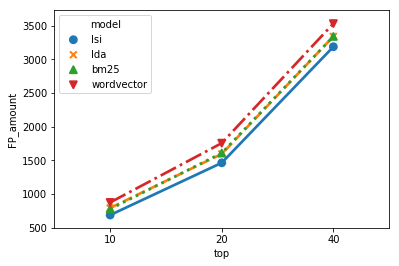

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.pointplot(y='FP_amount', x='top', 
              hue='model', 
              col='retrieved', 
              markers=['o','x','^','v'], 
              linestyles=["-","--",":","-."], 
              data=retrieved_traces_df)

##### FP Details

In [37]:
df_bm25_t10 = aux_functions.detail_features_tc_br(bm25_fp_exc_set_t10, testcases, bugreports)
df_bm25_t40 = aux_functions.detail_features_tc_br(bm25_fp_exc_set_t40, testcases, bugreports)

bm25_t10_fp_amount_by_feat = df_bm25_t10.groupby('tc_feat').count()
bm25_t40_fp_amount_by_feat = df_bm25_t40.groupby('tc_feat').count()
bm25_t10_fp_amount_by_feat['model'] = 'bm25'
bm25_t40_fp_amount_by_feat['model'] = 'bm25'


df_lda_t10 = aux_functions.detail_features_tc_br(lda_fp_exc_set_t10, testcases, bugreports)
df_lda_t40 = aux_functions.detail_features_tc_br(lda_fp_exc_set_t40, testcases, bugreports)

lda_t10_fp_amount_by_feat = df_lda_t10.groupby('tc_feat').count()
lda_t40_fp_amount_by_feat = df_lda_t40.groupby('tc_feat').count()
lda_t10_fp_amount_by_feat['model'] = 'lda'
lda_t40_fp_amount_by_feat['model'] = 'lda'


df_lsi_t10 = aux_functions.detail_features_tc_br(lsi_fp_exc_set_t10, testcases, bugreports)
df_lsi_t40 = aux_functions.detail_features_tc_br(lsi_fp_exc_set_t40, testcases, bugreports)

lsi_t10_fp_amount_by_feat = df_lsi_t10.groupby('tc_feat').count()
lsi_t40_fp_amount_by_feat = df_lsi_t40.groupby('tc_feat').count()
lsi_t10_fp_amount_by_feat['model'] = 'lsi'
lsi_t40_fp_amount_by_feat['model'] = 'lsi'


df_wv_t10 = aux_functions.detail_features_tc_br(wv_fp_exc_set_t10, testcases, bugreports)
df_wv_t40 = aux_functions.detail_features_tc_br(wv_fp_exc_set_t40, testcases, bugreports)

wv_t10_fp_amount_by_feat = df_wv_t10.groupby('tc_feat').count()
wv_t40_fp_amount_by_feat = df_wv_t40.groupby('tc_feat').count()
wv_t10_fp_amount_by_feat['model'] = 'wordvector'
wv_t40_fp_amount_by_feat['model'] = 'wordvector'

In [38]:
df_t10 = pd.concat([bm25_t10_fp_amount_by_feat, lsi_t10_fp_amount_by_feat,
                   lda_t10_fp_amount_by_feat, wv_t10_fp_amount_by_feat])

df_t10 = df_t10[['tc','model']]
df_t10.reset_index(inplace=True)
df_t10.rename(columns={'tc':'FP_amount','tc_feat':'feature'}, inplace=True)
df_t10 = df_t10.pivot('feature','model','FP_amount')
df_t10.head(20)

model,bm25,lda,lsi,wordvector
feature,,,,
APZ - Async Scrolling,35.0,NaN,31.0,9.0
Browser Customization,23.0,15.0,35.0,2.0
Context Menu,51.0,71.0,22.0,141.0
Downloads Dropmaker,80.0,23.0,9.0,8.0
FLAC support,5.0,56.0,12.0,3.0
Flash support,1.0,NaN,9.0,3.0
Indicator for device permissions,45.0,18.0,56.0,28.0
New Awesome Bar,15.0,69.0,97.0,16.0
PDF Viewer,12.0,65.0,8.0,1.0


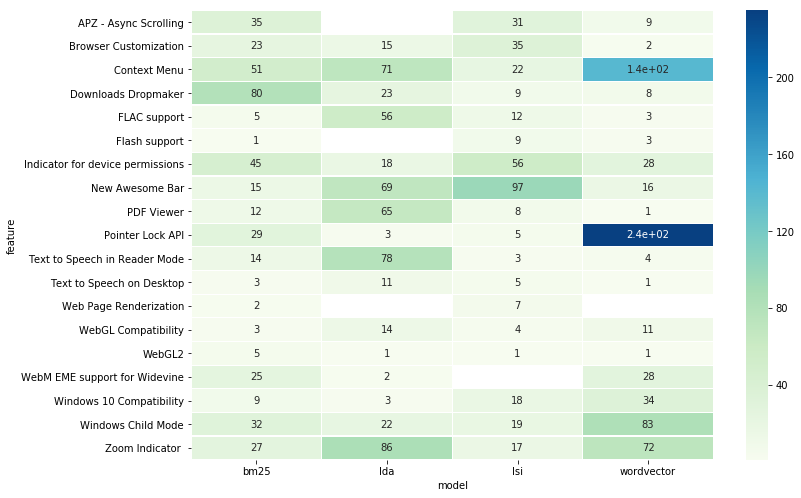

In [39]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(ax=ax, data=df_t10, linewidths=.3, annot=True, cmap='GnBu')

In [40]:
df_t40 = pd.concat([bm25_t40_fp_amount_by_feat, lsi_t40_fp_amount_by_feat,
                     lda_t40_fp_amount_by_feat,  wv_t40_fp_amount_by_feat])

df_t40 = df_t40[['tc','model']]
df_t40.reset_index(inplace=True)
df_t40.rename(columns={'tc':'FP_amount','tc_feat':'feature'}, inplace=True)
df_t40 = df_t40.pivot('feature','model','FP_amount')
df_t40.head(20)

model,bm25,lda,lsi,wordvector
feature,,,,
APZ - Async Scrolling,78.0,33.0,95.0,71.0
Browser Customization,49.0,47.0,75.0,26.0
Context Menu,112.0,171.0,71.0,523.0
Downloads Dropmaker,205.0,56.0,46.0,81.0
FLAC support,18.0,86.0,20.0,18.0
Flash support,3.0,10.0,15.0,12.0
Indicator for device permissions,91.0,17.0,133.0,119.0
New Awesome Bar,23.0,76.0,142.0,16.0
PDF Viewer,23.0,234.0,16.0,11.0


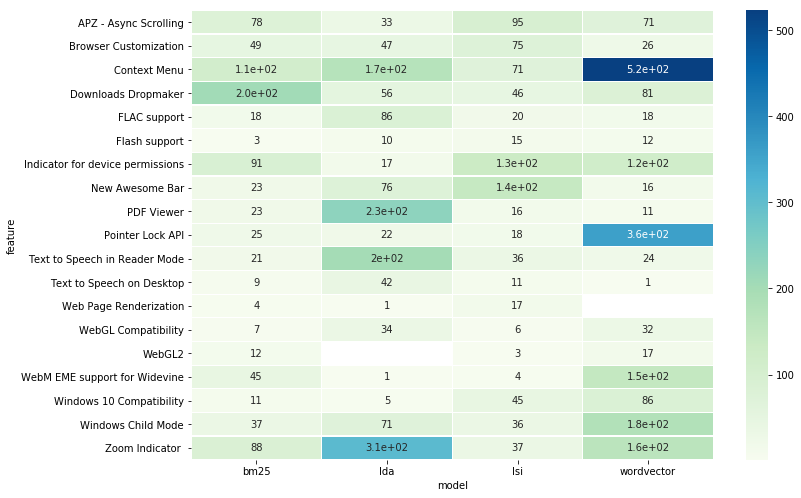

In [41]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(ax=ax, data=df_t40, linewidths=.3, annot=True, cmap='GnBu')

#### False Negatives Analysis

In [42]:
bm25_fn_set_t10, lsi_fn_set_t10, lda_fn_set_t10, wv_fn_set_t10 = aux_functions.get_traces_set(retrieved_traces_df, 10, 'FN')
bm25_fn_set_t20, lsi_fn_set_t20, lda_fn_set_t20, wv_fn_set_t20 = aux_functions.get_traces_set(retrieved_traces_df, 20, 'FN')
bm25_fn_set_t40, lsi_fn_set_t40, lda_fn_set_t40, wv_fn_set_t40 = aux_functions.get_traces_set(retrieved_traces_df, 40, 'FN')

#aux_functions.plot_venn_diagrams(10, bm25_fn_set_t10, lsi_fn_set_t10, lda_fn_set_t10, wv_fn_set_t10, 'FN')
#aux_functions.plot_venn_diagrams(40, bm25_fn_set_t40, lsi_fn_set_t40, lda_fn_set_t40, wv_fn_set_t40, 'FN')

In [43]:
df = pd.DataFrame(index=['TOP 10', 'TOP 20', 'TOP 40'], columns=['BM25','LSI','LDA','WordVector'])

df.at['TOP 10','BM25'] = len(bm25_fn_set_t10)
df.at['TOP 20','BM25'] = len(bm25_fn_set_t20)
df.at['TOP 40','BM25'] = len(bm25_fn_set_t40)

df.at['TOP 10','LSI'] = len(lsi_fn_set_t10)
df.at['TOP 20','LSI'] = len(lsi_fn_set_t20)
df.at['TOP 40','LSI'] = len(lsi_fn_set_t40)

df.at['TOP 10','LDA'] = len(lda_fn_set_t10)
df.at['TOP 20','LDA'] = len(lda_fn_set_t20)
df.at['TOP 40','LDA'] = len(lda_fn_set_t40)

df.at['TOP 10','WordVector'] = len(wv_fn_set_t10)
df.at['TOP 20','WordVector'] = len(wv_fn_set_t20)
df.at['TOP 40','WordVector'] = len(wv_fn_set_t40)

print()

df

,BM25,LSI,LDA,WordVector
TOP 10,381,293,398,480
TOP 20,301,158,290,450
TOP 40,211,60,213,404


##### Exclusive Traces

In [44]:
print("TOP 10 ------------------------------")
bm25_fn_exc_set_t10, lsi_fn_exc_set_t10, lda_fn_exc_set_t10, wv_fn_exc_set_t10 =  aux_functions.get_exclusive_traces(bm25_fn_set_t10, lsi_fn_set_t10, lda_fn_set_t10, wv_fn_set_t10, traces_type='FN')

print("\n\nTOP 20 -------------------------------")
bm25_fn_exc_set_t20, lsi_fn_exc_set_t20, lda_fn_exc_set_t20, wv_fn_exc_set_t20 =  aux_functions.get_exclusive_traces(bm25_fn_set_t20, lsi_fn_set_t20, lda_fn_set_t20, wv_fn_set_t20, traces_type='FN')

print("\n\nTOP 40 -------------------------------")
bm25_fn_exc_set_t40, lsi_fn_exc_set_t40, lda_fn_exc_set_t40, wv_fn_exc_set_t40 =  aux_functions.get_exclusive_traces(bm25_fn_set_t40, lsi_fn_set_t40, lda_fn_set_t40, wv_fn_set_t40, traces_type='FN')

TOP 10 ------------------------------
BM25 Exclusive FN:
len(bm25_exc_set): 0


LSI Exclusive FN:
len(lsi_exc_set): 0


LDA Exclusive FN:
len(lda_exc_set): 11


WV Exclusive FN:
len(wv_exc_set): 33


TOP 20 -------------------------------
BM25 Exclusive FN:
len(bm25_exc_set): 7


LSI Exclusive FN:
len(lsi_exc_set): 4


LDA Exclusive FN:
len(lda_exc_set): 7


WV Exclusive FN:
len(wv_exc_set): 92


TOP 40 -------------------------------
BM25 Exclusive FN:
len(bm25_exc_set): 4


LSI Exclusive FN:
len(lsi_exc_set): 2


LDA Exclusive FN:
len(lda_exc_set): 25


WV Exclusive FN:
len(wv_exc_set): 138


##### FN Details

In [45]:
df_bm25_t10 = aux_functions.detail_features_tc_br(bm25_fn_exc_set_t10, testcases, bugreports)
df_bm25_t40 = aux_functions.detail_features_tc_br(bm25_fn_exc_set_t40, testcases, bugreports)

bm25_t10_fn_amount_by_feat = df_bm25_t10.groupby('tc_feat').count()
bm25_t40_fn_amount_by_feat = df_bm25_t40.groupby('tc_feat').count()
bm25_t10_fn_amount_by_feat['model'] = 'bm25'
bm25_t40_fn_amount_by_feat['model'] = 'bm25'


df_lda_t10 = aux_functions.detail_features_tc_br(lda_fn_exc_set_t10, testcases, bugreports)
df_lda_t40 = aux_functions.detail_features_tc_br(lda_fn_exc_set_t40, testcases, bugreports)

lda_t10_fn_amount_by_feat = df_lda_t10.groupby('tc_feat').count()
lda_t40_fn_amount_by_feat = df_lda_t40.groupby('tc_feat').count()
lda_t10_fn_amount_by_feat['model'] = 'lda'
lda_t40_fn_amount_by_feat['model'] = 'lda'


df_lsi_t10 = aux_functions.detail_features_tc_br(lsi_fn_exc_set_t10, testcases, bugreports)
df_lsi_t40 = aux_functions.detail_features_tc_br(lsi_fn_exc_set_t40, testcases, bugreports)

lsi_t10_fn_amount_by_feat = df_lsi_t10.groupby('tc_feat').count()
lsi_t40_fn_amount_by_feat = df_lsi_t40.groupby('tc_feat').count()
lsi_t10_fn_amount_by_feat['model'] = 'lsi'
lsi_t40_fn_amount_by_feat['model'] = 'lsi'


df_wv_t10 = aux_functions.detail_features_tc_br(wv_fn_exc_set_t10, testcases, bugreports)
df_wv_t40 = aux_functions.detail_features_tc_br(wv_fn_exc_set_t40, testcases, bugreports)

wv_t10_fn_amount_by_feat = df_wv_t10.groupby('tc_feat').count()
wv_t40_fn_amount_by_feat = df_wv_t40.groupby('tc_feat').count()
wv_t10_fn_amount_by_feat['model'] = 'wordvector'
wv_t40_fn_amount_by_feat['model'] = 'wordvector'

###### TOP 10

In [46]:
df_t10 = pd.concat([bm25_t10_fn_amount_by_feat,  lsi_t10_fn_amount_by_feat,
                     lda_t10_fn_amount_by_feat, wv_t10_fn_amount_by_feat])

df_t10 = df_t10[['tc','model']]
df_t10.reset_index(inplace=True)
df_t10.rename(columns={'tc':'FN_amount','tc_feat':'feature'}, inplace=True)
df_t10 = df_t10.pivot('feature','model','FN_amount')
df_t10.head(20)

model,lda,wordvector
feature,,
Browser Customization,NaN,2.0
Context Menu,2.0,NaN
Downloads Dropmaker,NaN,11.0
Indicator for device permissions,2.0,3.0
New Awesome Bar,6.0,15.0
PDF Viewer,NaN,1.0
Zoom Indicator,1.0,1.0


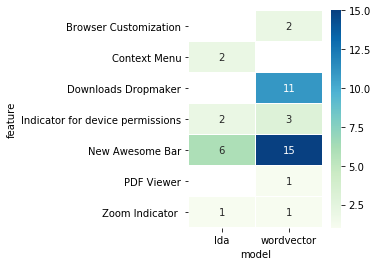

In [47]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (3, 4)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(ax=ax, data=df_t10, linewidths=.3, annot=True, cmap='GnBu')

###### TOP 40

In [48]:
df_t40 = pd.concat([bm25_t40_fn_amount_by_feat, lsi_t40_fn_amount_by_feat,
                     lda_t40_fn_amount_by_feat,  wv_t40_fn_amount_by_feat])

df_t40 = df_t40[['tc','model']]
df_t40.reset_index(inplace=True)
df_t40.rename(columns={'tc':'FN_amount','tc_feat':'feature'}, inplace=True)
df_t40 = df_t40.pivot('feature','model','FN_amount')
df_t40.head(20)

model,bm25,lda,lsi,wordvector
feature,,,,
Browser Customization,NaN,NaN,1.0,4.0
Context Menu,4.0,13.0,NaN,1.0
Downloads Dropmaker,NaN,2.0,1.0,41.0
Indicator for device permissions,NaN,1.0,NaN,15.0
New Awesome Bar,NaN,9.0,NaN,57.0
PDF Viewer,NaN,NaN,NaN,8.0
Zoom Indicator,NaN,NaN,NaN,12.0


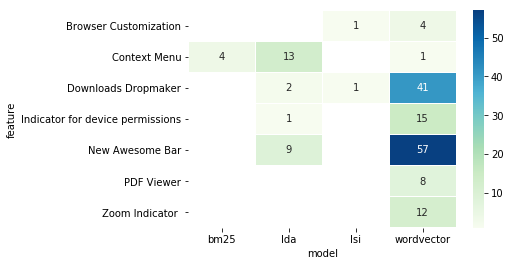

In [49]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (6, 4)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.heatmap(ax=ax, data=df_t40, linewidths=.3, annot=True, cmap='GnBu')

### Retrieved Traces - Similarity Threshold 0.9

In [50]:
retrieved_traces_df = aux_functions.get_retrieved_traces_df(oracle=exp_vol_intersec_strat_runner.get_oracle(), evals_df=evals_df_2, top_values=[10,20,40], sim_threshs=[0.9])
retrieved_traces_df[['top','sim_thresh','model','TP_amount','FP_amount','FN_amount','precision','recall','fscore']].head(50)

,top,sim_thresh,model,TP_amount,FP_amount,FN_amount,precision,recall,fscore
0,10,0.9,lsi,23,26,491,46.94,4.47,8.17
3,10,0.9,lda,32,125,482,20.38,6.23,9.54
6,10,0.9,bm25,39,150,475,20.63,7.59,11.10
9,10,0.9,wordvector,34,802,480,4.07,6.61,5.04
1,20,0.9,lsi,23,26,491,46.94,4.47,8.17
4,20,0.9,lda,38,158,476,19.39,7.39,10.70
7,20,0.9,bm25,39,150,475,20.63,7.59,11.10
10,20,0.9,wordvector,64,1602,450,3.84,12.45,5.87
2,40,0.9,lsi,23,26,491,46.94,4.47,8.17
5,40,0.9,lda,38,166,476,18.63,7.39,10.58


#### Traces Not Captured by Any Technique

In [51]:
print('TOP 10 --------------------------')
all_captured_traces_t10_inter = aux_functions.get_captured_traces_union(top_value=10, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t10_inter = oracle_true_traces_inter - all_captured_traces_t10_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t10_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t10_inter), len(oracle_true_traces_inter), len(not_captured_traces_t10_inter)/len(oracle_true_traces_inter)*100))

print('\n\nTOP 20 --------------------------')
all_captured_traces_t20_inter = aux_functions.get_captured_traces_union(top_value=20, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t20_inter = oracle_true_traces_inter - all_captured_traces_t20_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t20_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t20_inter), len(oracle_true_traces_inter), len(not_captured_traces_t20_inter)/len(oracle_true_traces_inter)*100))

print('\n\nTOP 40 --------------------------')
all_captured_traces_t40_inter = aux_functions.get_captured_traces_union(top_value=40, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t40_inter = oracle_true_traces_inter - all_captured_traces_t40_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t40_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t40_inter), len(oracle_true_traces_inter), len(not_captured_traces_t40_inter)/len(oracle_true_traces_inter)*100))

TOP 10 --------------------------
len(not_captured_traces): 413
percent not_captured_traces: 413/514 * 100 : 80.35%


TOP 20 --------------------------
len(not_captured_traces): 382
percent not_captured_traces: 382/514 * 100 : 74.32%


TOP 40 --------------------------
len(not_captured_traces): 344
percent not_captured_traces: 344/514 * 100 : 66.93%


#### Traces Captured by Every Technique

In [52]:
import pprint

print('TOP 10 -----------------------')
traces_captured_by_all_t10_inter = aux_functions.get_captured_traces_intersec(10, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t10_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t10_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t10_inter)/len(oracle_true_traces_inter) *100))
pprint.pprint(traces_captured_by_all_t10_inter)

print('\n\nTOP 20 -----------------------')
traces_captured_by_all_t20_inter = aux_functions.get_captured_traces_intersec(20, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t20_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t20_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t20_inter)/len(oracle_true_traces_inter) *100))
pprint.pprint(traces_captured_by_all_t20_inter)

print('\n\nTOP 40 -----------------------')
traces_captured_by_all_t40_inter = aux_functions.get_captured_traces_intersec(40, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t40_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t40_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t40_inter)/len(oracle_true_traces_inter) *100))
pprint.pprint(traces_captured_by_all_t40_inter)

TOP 10 -----------------------
len(traces_captured_by_all): 0
percent traces_captured_by_all: 0/514 * 100 : 0.0%
set()


TOP 20 -----------------------
len(traces_captured_by_all): 0
percent traces_captured_by_all: 0/514 * 100 : 0.0%
set()


TOP 40 -----------------------
len(traces_captured_by_all): 0
percent traces_captured_by_all: 0/514 * 100 : 0.0%
set()


#### True Positives Analysis

In [53]:
bm25_tp_set_t10, lsi_tp_set_t10, lda_tp_set_t10, wv_tp_set_t10 = aux_functions.get_traces_set(retrieved_traces_df, 10, 'TP')
bm25_tp_set_t20, lsi_tp_set_t20, lda_tp_set_t20, wv_tp_set_t20 = aux_functions.get_traces_set(retrieved_traces_df, 20, 'TP')
bm25_tp_set_t40, lsi_tp_set_t40, lda_tp_set_t40, wv_tp_set_t40 = aux_functions.get_traces_set(retrieved_traces_df, 40, 'TP')

#aux_functions.plot_venn_diagrams(TOP, bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5, 'True Positives')

df = pd.DataFrame(index=['TOP 10', 'TOP 20', 'TOP 40'], columns=['BM25','LSI','LDA','WordVector'])

df.at['TOP 10','BM25'] = len(bm25_tp_set_t10)
df.at['TOP 20','BM25'] = len(bm25_tp_set_t20)
df.at['TOP 40','BM25'] = len(bm25_tp_set_t40)

df.at['TOP 10','LSI'] = len(lsi_tp_set_t10)
df.at['TOP 20','LSI'] = len(lsi_tp_set_t20)
df.at['TOP 40','LSI'] = len(lsi_tp_set_t40)

df.at['TOP 10','LDA'] = len(lda_tp_set_t10)
df.at['TOP 20','LDA'] = len(lda_tp_set_t20)
df.at['TOP 40','LDA'] = len(lda_tp_set_t40)

df.at['TOP 10','WordVector'] = len(wv_tp_set_t10)
df.at['TOP 20','WordVector'] = len(wv_tp_set_t20)
df.at['TOP 40','WordVector'] = len(wv_tp_set_t40)

print()

df

,BM25,LSI,LDA,WordVector
TOP 10,39,23,32,34
TOP 20,39,23,38,64
TOP 40,39,23,38,109


##### Exclusive Traces

In [54]:
import pandas as pd

print("TOP 10 ------------------------------")
bm25_tp_exc_set_t10, lsi_tp_exc_set_t10, lda_tp_exc_set_t10, wv_tp_exc_set_t10 =  aux_functions.get_exclusive_traces(bm25_tp_set_t10, lsi_tp_set_t10, lda_tp_set_t10, wv_tp_set_t10, traces_type='TP')

print("\n\nTOP 20 ------------------------------")
bm25_tp_exc_set_t20, lsi_tp_exc_set_t20, lda_tp_exc_set_t20, wv_tp_exc_set_t20 =  aux_functions.get_exclusive_traces(bm25_tp_set_t20, lsi_tp_set_t20, lda_tp_set_t20, wv_tp_set_t20, traces_type='TP')

print("\n\nTOP 40 -------------------------------")
bm25_tp_exc_set_t40, lsi_tp_exc_set_t40, lda_tp_exc_set_t40, wv_tp_exc_set_t40 =  aux_functions.get_exclusive_traces(bm25_tp_set_t40, lsi_tp_set_t40, lda_tp_set_t40, wv_tp_set_t40, traces_type='TP')

df = pd.DataFrame(index=['TOP 10', 'TOP 20', 'TOP 40'], columns=['BM25','LSI','LDA','WordVector'])

df.at['TOP 10','BM25'] = len(bm25_tp_exc_set_t10)
df.at['TOP 20','BM25'] = len(bm25_tp_exc_set_t20)
df.at['TOP 40','BM25'] = len(bm25_tp_exc_set_t40)

df.at['TOP 10','LSI'] = len(lsi_tp_exc_set_t10)
df.at['TOP 20','LSI'] = len(lsi_tp_exc_set_t20)
df.at['TOP 40','LSI'] = len(lsi_tp_exc_set_t40)

df.at['TOP 10','LDA'] = len(lda_tp_exc_set_t10)
df.at['TOP 20','LDA'] = len(lda_tp_exc_set_t20)
df.at['TOP 40','LDA'] = len(lda_tp_exc_set_t40)

df.at['TOP 10','WordVector'] = len(wv_tp_exc_set_t10)
df.at['TOP 20','WordVector'] = len(wv_tp_exc_set_t20)
df.at['TOP 40','WordVector'] = len(wv_tp_exc_set_t40)

print()

df

TOP 10 ------------------------------
BM25 Exclusive TP:
len(bm25_exc_set): 25


LSI Exclusive TP:
len(lsi_exc_set): 8


LDA Exclusive TP:
len(lda_exc_set): 23


WV Exclusive TP:
len(wv_exc_set): 22


TOP 20 ------------------------------
BM25 Exclusive TP:
len(bm25_exc_set): 21


LSI Exclusive TP:
len(lsi_exc_set): 8


LDA Exclusive TP:
len(lda_exc_set): 28


WV Exclusive TP:
len(wv_exc_set): 47


TOP 40 -------------------------------
BM25 Exclusive TP:
len(bm25_exc_set): 15


LSI Exclusive TP:
len(lsi_exc_set): 7


LDA Exclusive TP:
len(lda_exc_set): 28


WV Exclusive TP:
len(wv_exc_set): 85



,BM25,LSI,LDA,WordVector
TOP 10,25,8,23,22
TOP 20,21,8,28,47
TOP 40,15,7,28,85


##### TP Details

In [55]:
df_bm25_t10 = aux_functions.detail_features_tc_br(bm25_tp_exc_set_t10, testcases, bugreports)
df_bm25_t40 = aux_functions.detail_features_tc_br(bm25_tp_exc_set_t40, testcases, bugreports)

bm25_t10_tp_amount_by_feat = df_bm25_t10.groupby('tc_feat').count()
bm25_t40_tp_amount_by_feat = df_bm25_t40.groupby('tc_feat').count()
bm25_t10_tp_amount_by_feat['model'] = 'bm25'
bm25_t40_tp_amount_by_feat['model'] = 'bm25'


df_lda_t10 = aux_functions.detail_features_tc_br(lda_tp_exc_set_t10, testcases, bugreports)
df_lda_t40 = aux_functions.detail_features_tc_br(lda_tp_exc_set_t40, testcases, bugreports)

lda_t10_tp_amount_by_feat = df_lda_t10.groupby('tc_feat').count()
lda_t40_tp_amount_by_feat = df_lda_t40.groupby('tc_feat').count()
lda_t10_tp_amount_by_feat['model'] = 'lda'
lda_t40_tp_amount_by_feat['model'] = 'lda'


df_lsi_t10 = aux_functions.detail_features_tc_br(lsi_tp_exc_set_t10, testcases, bugreports)
df_lsi_t40 = aux_functions.detail_features_tc_br(lsi_tp_exc_set_t40, testcases, bugreports)

lsi_t10_tp_amount_by_feat = df_lsi_t10.groupby('tc_feat').count()
lsi_t40_tp_amount_by_feat = df_lsi_t40.groupby('tc_feat').count()
lsi_t10_tp_amount_by_feat['model'] = 'lsi'
lsi_t40_tp_amount_by_feat['model'] = 'lsi'


df_wv_t10 = aux_functions.detail_features_tc_br(wv_tp_exc_set_t10, testcases, bugreports)
df_wv_t40 = aux_functions.detail_features_tc_br(wv_tp_exc_set_t40, testcases, bugreports)

wv_t10_tp_amount_by_feat = df_wv_t10.groupby('tc_feat').count()
wv_t40_tp_amount_by_feat = df_wv_t40.groupby('tc_feat').count()
wv_t10_tp_amount_by_feat['model'] = 'wordvector'
wv_t40_tp_amount_by_feat['model'] = 'wordvector'

###### TOP 10

In [56]:
df_t10 = pd.concat([bm25_t10_tp_amount_by_feat,  lsi_t10_tp_amount_by_feat,
                     lda_t10_tp_amount_by_feat,   wv_t10_tp_amount_by_feat])

df_t10 = df_t10[['tc','model']]
df_t10.reset_index(inplace=True)
df_t10.rename(columns={'tc':'TP_amount','tc_feat':'feature'}, inplace=True)
df_t10 = df_t10.pivot('feature','model','TP_amount')
df_t10.head(20)

model,bm25,lda,lsi,wordvector
feature,,,,
Browser Customization,3.0,NaN,NaN,NaN
Context Menu,NaN,1.0,NaN,12.0
Downloads Dropmaker,9.0,3.0,8.0,2.0
Indicator for device permissions,5.0,NaN,NaN,2.0
New Awesome Bar,6.0,19.0,NaN,4.0
PDF Viewer,1.0,NaN,NaN,NaN
Zoom Indicator,1.0,NaN,NaN,2.0


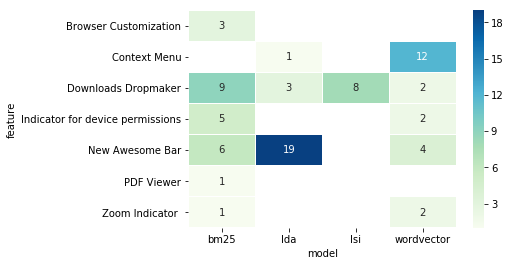

In [57]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (6, 4)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(ax=ax, data=df_t10, linewidths=.3, annot=True, cmap='GnBu')

###### TOP 40

In [58]:
df_t40 = pd.concat([bm25_t40_tp_amount_by_feat, lsi_t40_tp_amount_by_feat,
                     lda_t40_tp_amount_by_feat,  wv_t40_tp_amount_by_feat])

df_t40 = df_t40[['tc','model']]
df_t40.reset_index(inplace=True)
df_t40.rename(columns={'tc':'TP_amount','tc_feat':'feature'}, inplace=True)
df_t40 = df_t40.pivot('feature','model','TP_amount')
df_t40.head(20)

model,bm25,lda,lsi,wordvector
feature,,,,
Browser Customization,2.0,NaN,NaN,1.0
Context Menu,NaN,NaN,NaN,44.0
Downloads Dropmaker,4.0,3.0,7.0,11.0
Indicator for device permissions,5.0,NaN,NaN,12.0
New Awesome Bar,3.0,25.0,NaN,10.0
PDF Viewer,1.0,NaN,NaN,NaN
Zoom Indicator,NaN,NaN,NaN,7.0


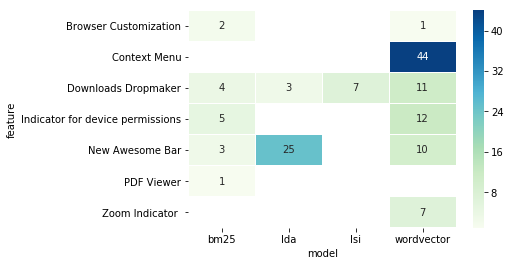

In [59]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (6, 4)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.heatmap(ax=ax, data=df_t40, linewidths=.3, annot=True, cmap='GnBu')

#### False Positives Analysis

In [60]:
bm25_fp_set_t10, lsi_fp_set_t10, lda_fp_set_t10, wv_fp_set_t10 = aux_functions.get_traces_set(retrieved_traces_df, 10, 'FP')
bm25_fp_set_t20, lsi_fp_set_t20, lda_fp_set_t20, wv_fp_set_t20 = aux_functions.get_traces_set(retrieved_traces_df, 20, 'FP')
bm25_fp_set_t40, lsi_fp_set_t40, lda_fp_set_t40, wv_fp_set_t40 = aux_functions.get_traces_set(retrieved_traces_df, 40, 'FP')

#aux_functions.plot_venn_diagrams(10, bm25_fp_set_t10, lsi_fp_set_t10, lda_fp_set_t10, wv_fp_set_t10, 'FP')
#print('====================')
#aux_functions.plot_venn_diagrams(20, bm25_fp_set_t20, lsi_fp_set_t20, lda_fp_set_t20, wv_fp_set_t20, 'FP')
#print('====================')
#aux_functions.plot_venn_diagrams(40, bm25_fp_set_t40, lsi_fp_set_t40, lda_fp_set_t40, wv_fp_set_t40, 'FP')

##### Exclusive Traces

In [61]:
print("TOP 10 ------------------------------")
bm25_fp_exc_set_t10, lsi_fp_exc_set_t10, lda_fp_exc_set_t10, wv_fp_exc_set_t10 =  aux_functions.get_exclusive_traces(bm25_fp_set_t10, lsi_fp_set_t10, lda_fp_set_t10, wv_fp_set_t10, traces_type='FP')

print("\n\nTOP 20 ------------------------------")
bm25_fp_exc_set_t20, lsi_fp_exc_set_t20, lda_fp_exc_set_t20, wv_fp_exc_set_t20 =  aux_functions.get_exclusive_traces(bm25_fp_set_t20, lsi_fp_set_t20, lda_fp_set_t20, wv_fp_set_t20, traces_type='FP')

print("\n\nTOP 40 -------------------------------")
bm25_fp_exc_set_t40, lsi_fp_exc_set_t40, lda_fp_exc_set_t40, wv_fp_exc_set_t40 =  aux_functions.get_exclusive_traces(bm25_fp_set_t40, lsi_fp_set_t40, lda_fp_set_t40, wv_fp_set_t40, traces_type='FP')

TOP 10 ------------------------------
BM25 Exclusive FP:
len(bm25_exc_set): 110


LSI Exclusive FP:
len(lsi_exc_set): 8


LDA Exclusive FP:
len(lda_exc_set): 103


WV Exclusive FP:
len(wv_exc_set): 754


TOP 20 ------------------------------
BM25 Exclusive FP:
len(bm25_exc_set): 94


LSI Exclusive FP:
len(lsi_exc_set): 6


LDA Exclusive FP:
len(lda_exc_set): 121


WV Exclusive FP:
len(wv_exc_set): 1525


TOP 40 -------------------------------
BM25 Exclusive FP:
len(bm25_exc_set): 71


LSI Exclusive FP:
len(lsi_exc_set): 6


LDA Exclusive FP:
len(lda_exc_set): 101


WV Exclusive FP:
len(wv_exc_set): 3074


##### FP Details

In [62]:
df_bm25_t10 = aux_functions.detail_features_tc_br(bm25_fp_exc_set_t10, testcases, bugreports)
df_bm25_t40 = aux_functions.detail_features_tc_br(bm25_fp_exc_set_t40, testcases, bugreports)

bm25_t10_fp_amount_by_feat = df_bm25_t10.groupby('tc_feat').count()
bm25_t40_fp_amount_by_feat = df_bm25_t40.groupby('tc_feat').count()
bm25_t10_fp_amount_by_feat['model'] = 'bm25'
bm25_t40_fp_amount_by_feat['model'] = 'bm25'


df_lda_t10 = aux_functions.detail_features_tc_br(lda_fp_exc_set_t10, testcases, bugreports)
df_lda_t40 = aux_functions.detail_features_tc_br(lda_fp_exc_set_t40, testcases, bugreports)

lda_t10_fp_amount_by_feat = df_lda_t10.groupby('tc_feat').count()
lda_t40_fp_amount_by_feat = df_lda_t40.groupby('tc_feat').count()
lda_t10_fp_amount_by_feat['model'] = 'lda'
lda_t40_fp_amount_by_feat['model'] = 'lda'


df_lsi_t10 = aux_functions.detail_features_tc_br(lsi_fp_exc_set_t10, testcases, bugreports)
df_lsi_t40 = aux_functions.detail_features_tc_br(lsi_fp_exc_set_t40, testcases, bugreports)

lsi_t10_fp_amount_by_feat = df_lsi_t10.groupby('tc_feat').count()
lsi_t40_fp_amount_by_feat = df_lsi_t40.groupby('tc_feat').count()
lsi_t10_fp_amount_by_feat['model'] = 'lsi'
lsi_t40_fp_amount_by_feat['model'] = 'lsi'


df_wv_t10 = aux_functions.detail_features_tc_br(wv_fp_exc_set_t10, testcases, bugreports)
df_wv_t40 = aux_functions.detail_features_tc_br(wv_fp_exc_set_t40, testcases, bugreports)

wv_t10_fp_amount_by_feat = df_wv_t10.groupby('tc_feat').count()
wv_t40_fp_amount_by_feat = df_wv_t40.groupby('tc_feat').count()
wv_t10_fp_amount_by_feat['model'] = 'wordvector'
wv_t40_fp_amount_by_feat['model'] = 'wordvector'

###### TOP 10

In [63]:
df_t10 = pd.concat([bm25_t10_fp_amount_by_feat,  lsi_t10_fp_amount_by_feat,
                     lda_t10_fp_amount_by_feat,   wv_t10_fp_amount_by_feat])

df_t10 = df_t10[['tc','model']]
df_t10.reset_index(inplace=True)
df_t10.rename(columns={'tc':'FP_amount','tc_feat':'feature'}, inplace=True)
df_t10 = df_t10.pivot('feature','model','FP_amount')
df_t10.head(20)

model,bm25,lda,lsi,wordvector
feature,,,,
APZ - Async Scrolling,3.0,NaN,NaN,5.0
Browser Customization,4.0,6.0,NaN,3.0
Context Menu,11.0,10.0,1.0,172.0
Downloads Dropmaker,16.0,5.0,NaN,9.0
FLAC support,2.0,17.0,NaN,6.0
Flash support,NaN,NaN,NaN,3.0
Indicator for device permissions,14.0,NaN,4.0,40.0
New Awesome Bar,17.0,9.0,NaN,24.0
PDF Viewer,5.0,13.0,NaN,1.0


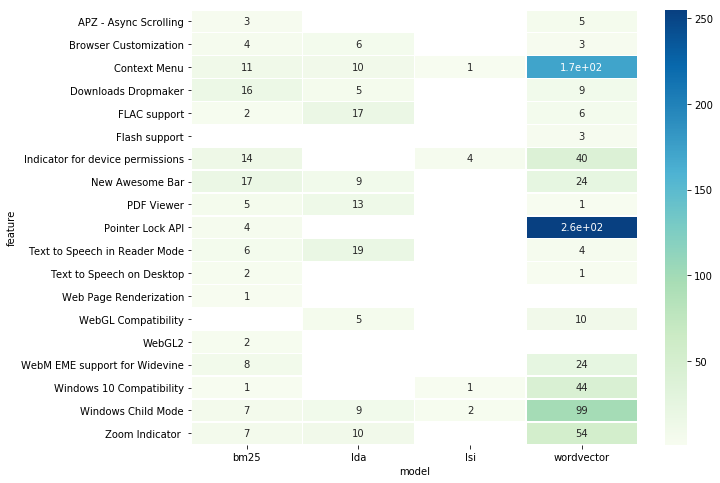

In [64]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(ax=ax, data=df_t10, linewidths=.3, annot=True, cmap='GnBu')

###### TOP 40

In [65]:
df_t40 = pd.concat([bm25_t40_fp_amount_by_feat, lsi_t40_fp_amount_by_feat,
                     lda_t40_fp_amount_by_feat,  wv_t40_fp_amount_by_feat])

df_t40 = df_t40[['tc','model']]
df_t40.reset_index(inplace=True)
df_t40.rename(columns={'tc':'FP_amount','tc_feat':'feature'}, inplace=True)
df_t40 = df_t40.pivot('feature','model','FP_amount')
df_t40.head(20)

model,bm25,lda,lsi,wordvector
feature,,,,
APZ - Async Scrolling,2.0,NaN,NaN,73.0
Browser Customization,4.0,5.0,NaN,43.0
Context Menu,1.0,4.0,NaN,921.0
Downloads Dropmaker,10.0,3.0,NaN,165.0
FLAC support,2.0,17.0,NaN,29.0
Flash support,NaN,NaN,NaN,23.0
Indicator for device permissions,10.0,NaN,4.0,251.0
New Awesome Bar,13.0,10.0,NaN,47.0
PDF Viewer,5.0,14.0,NaN,19.0


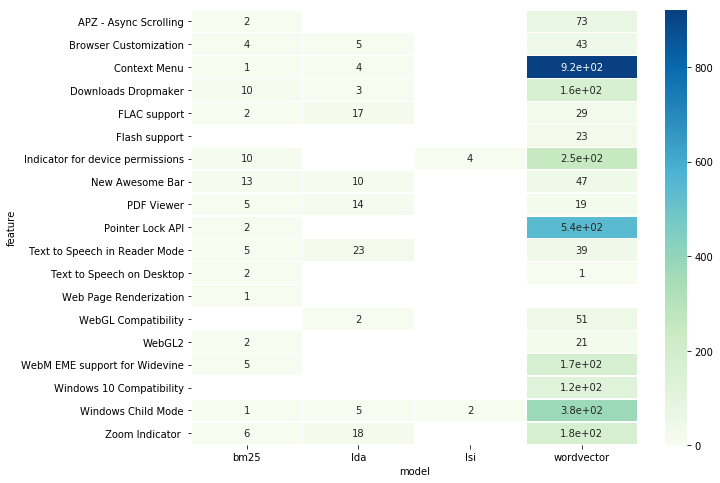

In [66]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.heatmap(ax=ax, data=df_t40, linewidths=.3, annot=True, cmap='GnBu')

#### False Negatives Analysis

In [67]:
bm25_fn_set_t10, lsi_fn_set_t10, lda_fn_set_t10, wv_fn_set_t10 = aux_functions.get_traces_set(retrieved_traces_df, 10, 'FN')
bm25_fn_set_t20, lsi_fn_set_t20, lda_fn_set_t20, wv_fn_set_t20 = aux_functions.get_traces_set(retrieved_traces_df, 20, 'FN')
bm25_fn_set_t40, lsi_fn_set_t40, lda_fn_set_t40, wv_fn_set_t40 = aux_functions.get_traces_set(retrieved_traces_df, 40, 'FN')

#print("TOP 10 -----------------------------------")
#aux_functions.plot_venn_diagrams(10, bm25_fn_set_t10, lsi_fn_set_t10, lda_fn_set_t10, wv_fn_set_t10, 'FN')

#print("\n\nTOP 40 -----------------------------------")
#aux_functions.plot_venn_diagrams(40, bm25_fn_set_t40, lsi_fn_set_t40, lda_fn_set_t40, wv_fn_set_t40, 'FN')

##### Exclusive Traces

In [68]:
print("TOP 10 ------------------------------")
bm25_fn_exc_set_t10, lsi_fn_exc_set_t10, lda_fn_exc_set_t10, wv_fn_exc_set_t10 =  aux_functions.get_exclusive_traces(bm25_fn_set_t10, lsi_fn_set_t10, lda_fn_set_t10, wv_fn_set_t10, traces_type='FN', verbose=True)

print("\n\nTOP 20 -------------------------------")
bm25_fn_exc_set_t20, lsi_fn_exc_set_t20, lda_fn_exc_set_t20, wv_fn_exc_set_t20 =  aux_functions.get_exclusive_traces(bm25_fn_set_t20, lsi_fn_set_t20, lda_fn_set_t20, wv_fn_set_t20, traces_type='FN', verbose=True)

print("\n\nTOP 40 -------------------------------")
bm25_fn_exc_set_t40, lsi_fn_exc_set_t40, lda_fn_exc_set_t40, wv_fn_exc_set_t40 =  aux_functions.get_exclusive_traces(bm25_fn_set_t40, lsi_fn_set_t40, lda_fn_set_t40, wv_fn_set_t40, traces_type='FN', verbose=True)

TOP 10 ------------------------------
BM25 Exclusive FN:


set()

len(bm25_exc_set): 0


LSI Exclusive FN:


set()

len(lsi_exc_set): 0


LDA Exclusive FN:


{(14, 1294733), (75, 1248267), (77, 1248267), (93, 1248267)}

len(lda_exc_set): 4


WV Exclusive FN:


set()

len(wv_exc_set): 0


TOP 20 -------------------------------
BM25 Exclusive FN:


set()

len(bm25_exc_set): 0


LSI Exclusive FN:


set()

len(lsi_exc_set): 0


LDA Exclusive FN:


{(14, 1294733), (75, 1248267), (77, 1248267), (93, 1248267)}

len(lda_exc_set): 4


WV Exclusive FN:


set()

len(wv_exc_set): 0


TOP 40 -------------------------------
BM25 Exclusive FN:


set()

len(bm25_exc_set): 0


LSI Exclusive FN:


set()

len(lsi_exc_set): 0


LDA Exclusive FN:


{(14, 1294733), (75, 1248267), (77, 1248267), (93, 1248267)}

len(lda_exc_set): 4


WV Exclusive FN:


set()

len(wv_exc_set): 0


##### FN Details

In [69]:
df_bm25_t10 = aux_functions.detail_features_tc_br(bm25_fn_exc_set_t10, testcases, bugreports)
df_bm25_t40 = aux_functions.detail_features_tc_br(bm25_fn_exc_set_t40, testcases, bugreports)

bm25_t10_fn_amount_by_feat = df_bm25_t10.groupby('tc_feat').count()
bm25_t40_fn_amount_by_feat = df_bm25_t40.groupby('tc_feat').count()
bm25_t10_fn_amount_by_feat['model'] = 'bm25'
bm25_t40_fn_amount_by_feat['model'] = 'bm25'


df_lda_t10 = aux_functions.detail_features_tc_br(lda_fn_exc_set_t10, testcases, bugreports)
df_lda_t40 = aux_functions.detail_features_tc_br(lda_fn_exc_set_t40, testcases, bugreports)

lda_t10_fn_amount_by_feat = df_lda_t10.groupby('tc_feat').count()
lda_t40_fn_amount_by_feat = df_lda_t40.groupby('tc_feat').count()
lda_t10_fn_amount_by_feat['model'] = 'lda'
lda_t40_fn_amount_by_feat['model'] = 'lda'


df_lsi_t10 = aux_functions.detail_features_tc_br(lsi_fn_exc_set_t10, testcases, bugreports)
df_lsi_t40 = aux_functions.detail_features_tc_br(lsi_fn_exc_set_t40, testcases, bugreports)

lsi_t10_fn_amount_by_feat = df_lsi_t10.groupby('tc_feat').count()
lsi_t40_fn_amount_by_feat = df_lsi_t40.groupby('tc_feat').count()
lsi_t10_fn_amount_by_feat['model'] = 'lsi'
lsi_t40_fn_amount_by_feat['model'] = 'lsi'


df_wv_t10 = aux_functions.detail_features_tc_br(wv_fn_exc_set_t10, testcases, bugreports)
df_wv_t40 = aux_functions.detail_features_tc_br(wv_fn_exc_set_t40, testcases, bugreports)

wv_t10_fn_amount_by_feat = df_wv_t10.groupby('tc_feat').count()
wv_t40_fn_amount_by_feat = df_wv_t40.groupby('tc_feat').count()
wv_t10_fn_amount_by_feat['model'] = 'wordvector'
wv_t40_fn_amount_by_feat['model'] = 'wordvector'

###### TOP 40

In [70]:
df_t40 = pd.concat([bm25_t40_fn_amount_by_feat, lsi_t40_fn_amount_by_feat,
                     lda_t40_fn_amount_by_feat,  wv_t40_fn_amount_by_feat])

df_t40 = df_t40[['tc','model']]
df_t40.reset_index(inplace=True)
df_t40.rename(columns={'tc':'FN_amount','tc_feat':'feature'}, inplace=True)
df_t40 = df_t40.pivot('feature','model','FN_amount')
df_t40.head(20)

model,lda
feature,
Context Menu,3
New Awesome Bar,1


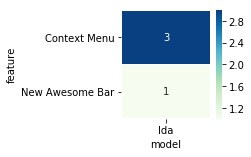

In [71]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (2,2)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.heatmap(ax=ax, data=df_t40, linewidths=.3, annot=True, cmap='GnBu')

### Recovery Effort Index (REI)

In [72]:
orc_vol_only_precision = 42.66
def calculate_rei(row):
    if row['precision'] > 0:
        return orc_vol_only_precision/row['precision']
    return 0

In [73]:
retrieved_traces_df['rei'] = retrieved_traces_df.apply(lambda row : calculate_rei(row), axis=1)
retrieved_traces_df[['top','model','precision','recall','rei']].groupby('model').rei.mean()

model
bm25           2.067862
lda            2.194396
lsi            0.908820
wordvector    11.519171
Name: rei, dtype: float64

### Goodness Scale

In [82]:
aux_functions.calculate_goodness(evals_df_2_1)

,model,precision,recall,goodness
0,bm25,13.65,29.41,-
1,lsi,28.43,48.63,-
2,lda,13.29,34.86,-
3,wordvector,3.46,13.47,-


### Delete Variables

## Volunteers Only Strategy

In [ ]:
vol_strat_runner = tc_br_strat_runner.TC_BR_Vol_Strat_Runner()
vol_strat_runner.execute()

evaluator_4 = vol_strat_runner.get_evaluator() 
evals_df_4 = vol_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_4.head()

In [ ]:
aux_functions.highlight_df(evals_df_4[['model','perc_precision','perc_recall','perc_fscore','top']].groupby(['model','top']).mean())

### Plots

In [ ]:
evaluator_4.plot_evaluations_3(evals_df_4, title='BR-TC Traceability Recovery - Volunteers-Only Strategy')

In [ ]:
evaluator_4.plot_evaluations_4(evals_df_4)

In [ ]:
evaluator_4.plot_evaluations_5(evals_df_4)

### Oracle True Traces

In [ ]:
oracle_true_traces_vol = aux_functions.get_oracle_true_positives(vol_strat_runner)
print('len(oracle_true_traces_inter): {}'.format(len(oracle_true_traces_vol)))

#### Wrong Traces Exploration

In [ ]:
sample_wrong_traces = set(list(oracle_true_traces_vol - oracle_true_traces_inter)[0:5])
sample_wrong_traces

In [ ]:
aux_functions.detail_features_tc_br(sample_wrong_traces, testcases, bugreports)

In [ ]:
#aux_functions.highlight_ranking_tc_br([br for tc,br in sample_wrong_traces], exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix(), top_value=40)
aux_functions.highlight_ranking_tc_br([1306639], exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix(), top_value=40)

### Delete Variables

## Union Strategy

In [ ]:
exp_vol_union_strat_runner = tc_br_strat_runner.TC_BR_Exp_Vol_Union_Strat_Runner()
exp_vol_union_strat_runner.execute()

evaluator_1 = exp_vol_union_strat_runner.get_evaluator() 
evals_df_1 = exp_vol_union_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_1.head()

### Plots

In [ ]:
evaluator_1.plot_evaluations_3(evals_df_1, title='BR-TC Traceability Recovery - Exp-Vol Union Strategy')

In [ ]:
evaluator_1.plot_evaluations_4(evals_df_1)

In [ ]:
evaluator_1.plot_evaluations_5(evals_df_1)

### Delete Variables

## Expert Only Strategy

In [ ]:
exp_strat_runner = tc_br_strat_runner.TC_BR_Exp_Strat_Runner()
exp_strat_runner.execute()

evaluator_3 = exp_strat_runner.get_evaluator() 
evals_df_3 = exp_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_3.head()

### Plots

In [ ]:
evaluator_3.plot_evaluations_3(evals_df_3, title='BR-TC Traceability Recovery - Expert-Only Strategy')

In [ ]:
evaluator_3.plot_evaluations_4(evals_df_3)

In [ ]:
evaluator_3.plot_evaluations_5(evals_df_3)

### Delete Variables